In [2]:
import pandas as pd

df_full = pd.read_csv('./data/ad_placement/census-income.csv')
                 
df_full.columns = ['AAGE','ACLSWKR','ADTIND','ADTOCC','AHGA','AHRSPAY','AHSCOL','AMARITL',
                                                                              'AMJIND','AMJOCC','ARACE','AREORGN','ASEX','AUNMEM','AUNTYPE','AWKSTAT','CAPGAIN',
                                                                              'CAPLOSS','DIVVAL','FILESTAT','GRINREG','GRINST','HHDFMX','HHDREL', 'MARSUPWT',
                                                                              'MIGMTR1','MIGMTR3','MIGMTR4','MIGSAME','MIGSUN','NOEMP','PARENT','PEFNTVTY',
                                                                              'PEMNTVTY','PENATVTY','PRCITSHP','SEOTR','VETQVA','VETYN','WKSWORK', 'YEAR', 'INCOME']

df_full.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,INCOME
0,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
1,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
2,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
3,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,...,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,- 50000.


In [3]:
df_reduced=df_full[['AAGE','ACLSWKR','ADTIND','ADTOCC','AHGA','AHRSPAY','AMARITL','ARACE','ASEX','AUNTYPE','AWKSTAT','CAPGAIN',
          'CAPLOSS','DIVVAL','FILESTAT','HHDREL','MIGMTR1','NOEMP','PARENT','SEOTR','VETYN','WKSWORK', 'YEAR', 'INCOME']]

df_reduced.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AMARITL,ARACE,ASEX,AUNTYPE,...,FILESTAT,HHDREL,MIGMTR1,NOEMP,PARENT,SEOTR,VETYN,WKSWORK,YEAR,INCOME
0,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Divorced,White,Male,Not in universe,...,Head of household,Householder,MSA to MSA,1,Not in universe,0,2,52,94,- 50000.
1,18,Not in universe,0,0,10th grade,0,Never married,Asian or Pacific Islander,Female,Not in universe,...,Nonfiler,Child 18 or older,?,0,Not in universe,0,2,0,95,- 50000.
2,9,Not in universe,0,0,Children,0,Never married,White,Female,Not in universe,...,Nonfiler,Child under 18 never married,Nonmover,0,Both parents present,0,0,0,94,- 50000.
3,10,Not in universe,0,0,Children,0,Never married,White,Female,Not in universe,...,Nonfiler,Child under 18 never married,Nonmover,0,Both parents present,0,0,0,94,- 50000.
4,48,Private,40,10,Some college but no degree,1200,Married-civilian spouse present,Amer Indian Aleut or Eskimo,Female,Not in universe,...,Joint both under 65,Spouse of householder,?,1,Not in universe,2,2,52,95,- 50000.


In [4]:
df_dummies=pd.get_dummies(df_reduced)
df_continuous=df_reduced[['AAGE','ADTIND','ADTOCC','AHRSPAY','CAPGAIN','CAPLOSS','DIVVAL','NOEMP','SEOTR','VETYN','WKSWORK', 'YEAR']]

In [5]:
print df_full.shape
print df_reduced.shape
print df_dummies.shape
print df_continuous.shape

(199522, 42)
(199522, 24)
(199522, 97)
(199522, 12)


In [8]:
from sklearn import cluster
from sklearn import preprocessing

df_scaled=preprocessing.scale(df_dummies)

k_means = cluster.KMeans(n_clusters=5)
k_means.fit(df_scaled)
clusters=k_means.predict(df_scaled)

y=pd.DataFrame(clusters)
results = pd.concat([df_dummies, y], axis=1)
print results.head()

   AAGE  ADTIND  ADTOCC  AHRSPAY  CAPGAIN  CAPLOSS  DIVVAL  NOEMP  SEOTR  \
0    58       4      34        0        0        0       0      1      0   
1    18       0       0        0        0        0       0      0      0   
2     9       0       0        0        0        0       0      0      0   
3    10       0       0        0        0        0       0      0      0   
4    48      40      10     1200        0        0       0      1      2   

   VETYN ...  MIGMTR1_ Not identifiable  MIGMTR1_ Not in universe  \
0      2 ...                        0.0                       0.0   
1      2 ...                        0.0                       0.0   
2      0 ...                        0.0                       0.0   
3      0 ...                        0.0                       0.0   
4      2 ...                        0.0                       0.0   

   PARENT_ Both parents present  PARENT_ Father only present  \
0                           0.0                          0.0   


In [15]:
names = results.columns.tolist()
names[names.index(0L)] = 'cluster'
results.columns = names
results.groupby(['cluster']).mean()

ValueError: 0L is not in list

In [16]:
results.groupby(['cluster']).count()

,AAGE,ADTIND,ADTOCC,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,NOEMP,SEOTR,VETYN,...,MIGMTR1_ Nonmover,MIGMTR1_ Not identifiable,MIGMTR1_ Not in universe,PARENT_ Both parents present,PARENT_ Father only present,PARENT_ Mother only present,PARENT_ Neither parent present,PARENT_ Not in universe,INCOME_ - 50000.,INCOME_ 50000+.
cluster,,,,,,,,,,,,,,,,,,,,,
0,12360,12360,12360,12360,12360,12360,12360,12360,12360,12360,...,12360,12360,12360,12360,12360,12360,12360,12360,12360,12360
1,53561,53561,53561,53561,53561,53561,53561,53561,53561,53561,...,53561,53561,53561,53561,53561,53561,53561,53561,53561,53561
2,45286,45286,45286,45286,45286,45286,45286,45286,45286,45286,...,45286,45286,45286,45286,45286,45286,45286,45286,45286,45286
3,43322,43322,43322,43322,43322,43322,43322,43322,43322,43322,...,43322,43322,43322,43322,43322,43322,43322,43322,43322,43322
4,44993,44993,44993,44993,44993,44993,44993,44993,44993,44993,...,44993,44993,44993,44993,44993,44993,44993,44993,44993,44993


In [27]:
from sklearn import cluster
from sklearn import preprocessing

df_scaled=preprocessing.scale(df_dummies)

k_means = cluster.KMeans(n_clusters=5)
k_means.fit(df_scaled)
clusters=k_means.predict(df_scaled)

y['cluster']=pd.DataFrame(clusters)
results = pd.concat([df_dummies, y], axis=1)
print results.head()

   AAGE  ADTIND  ADTOCC  AHRSPAY  CAPGAIN  CAPLOSS  DIVVAL  NOEMP  SEOTR  \
0    58       4      34        0        0        0       0      1      0   
1    18       0       0        0        0        0       0      0      0   
2     9       0       0        0        0        0       0      0      0   
3    10       0       0        0        0        0       0      0      0   
4    48      40      10     1200        0        0       0      1      2   

   VETYN   ...     MIGMTR1_ Not in universe  PARENT_ Both parents present  \
0      2   ...                          0.0                           0.0   
1      2   ...                          0.0                           0.0   
2      0   ...                          0.0                           1.0   
3      0   ...                          0.0                           1.0   
4      2   ...                          0.0                           0.0   

   PARENT_ Father only present  PARENT_ Mother only present  \
0                

In [59]:
output=results.groupby(['cluster']).mean()

In [60]:
output.to_excel("output_means.xlsx")

In [17]:
results.head()

,AAGE,ADTIND,ADTOCC,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,NOEMP,SEOTR,VETYN,...,MIGMTR1_ Not identifiable,MIGMTR1_ Not in universe,PARENT_ Both parents present,PARENT_ Father only present,PARENT_ Mother only present,PARENT_ Neither parent present,PARENT_ Not in universe,INCOME_ - 50000.,INCOME_ 50000+.,cluster
0,58,4,34,0,0,0,0,1,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2
1,18,0,0,0,0,0,0,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4
2,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,10,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,48,40,10,1200,0,0,0,1,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3


c:\Users\DES368\AppData\Local\Continuum\Anaconda2\lib\site-packages\seaborn\categorical.py:2125: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


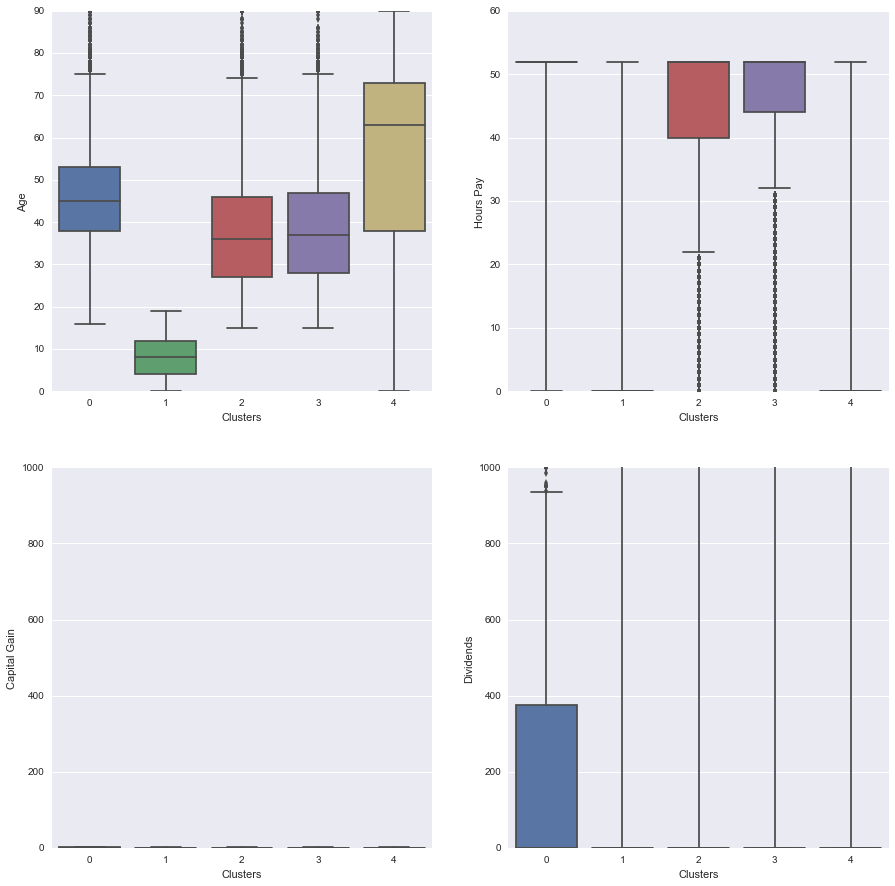

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,15))

ax1 = plt.subplot(221)
sns.boxplot(results['AAGE'], groupby=results['cluster'])
plt.xlabel("Clusters")
plt.ylabel("Age")

ax2 = plt.subplot(222)
sns.boxplot(results['WKSWORK'], groupby=results['cluster'])
plt.xlabel("Clusters")
plt.ylabel("Hours Pay")

ax3 = plt.subplot(223)
sns.boxplot(results['AHGA_ Bachelors degree(BA AB BS)'], groupby=results['cluster'])
plt.ylim(0, 1000)
plt.xlabel("Clusters")
plt.ylabel("Capital Gain")

ax4 = plt.subplot(224)
sns.boxplot(results['DIVVAL'], groupby=results['cluster'])
plt.ylim(0, 1000)
plt.xlabel("Clusters")
plt.ylabel("Dividends")